# 2. Program to Implement Image Enhancement Operations

In [1]:
# Import necessary libraries
import cv2                      # OpenCV for image processing
import numpy as np              # NumPy for numerical operations
import matplotlib.pyplot as plt # Matplotlib for visualization

# Read the input image
img = cv2.imread("../00 Inputs/clock.png")

# Convert the image from BGR (OpenCV default) to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Histogram Equalization to enhance contrast
HistEq = cv2.equalizeHist(gray)

# Apply Otsu's Thresholding to binarize the grayscale image
binr = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Define a kernel for morphological operations (3x3 matrix of ones)
kernel = np.ones((3, 3), np.uint8)

# Apply Morphological Opening to remove small noise (Erosion followed by Dilation)
opening = cv2.morphologyEx(binr, cv2.MORPH_OPEN, kernel, iterations=1)

# Save intermediate images to disk
cv2.imwrite("../00 Outputs/GrayImg.jpg", gray)
cv2.imwrite("../00 Outputs/HistogramEqualization.jpg", HistEq)
cv2.imwrite("../00 Outputs/MorphologicalOperation.jpg", opening)

True

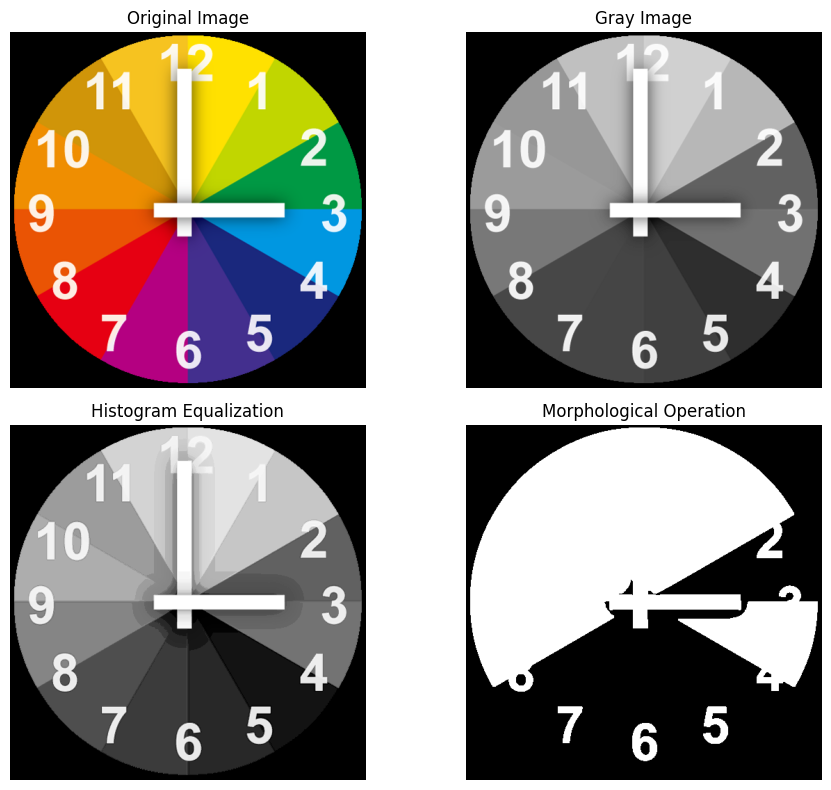

In [2]:

# Plotting all stages of processing using matplotlib
plt.figure(figsize=(10, 8))

# Display Original Image
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # Convert BGR to RGB for correct color display
plt.title("Original Image")
plt.axis('off')

# Display Grayscale Image
plt.subplot(2, 2, 2)
plt.imshow(gray, cmap='gray')
plt.title("Gray Image")
plt.axis('off')

# Display Histogram Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(HistEq, cmap='gray')
plt.title("Histogram Equalization")
plt.axis('off')

# Display Morphological Operation Result
plt.subplot(2, 2, 4)
plt.imshow(opening, cmap='gray')
plt.title("Morphological Operation")
plt.axis('off')

# Adjust layout and show all plots
plt.tight_layout()
plt.show()